Dataset Shape: (1470, 35)
Random Sample from Dataset:
      Age Attrition     BusinessTravel  DailyRate              Department  \
141    45        No      Travel_Rarely       1316  Research & Development   
451    42        No      Travel_Rarely        319  Research & Development   
727    18        No         Non-Travel        287  Research & Development   
38     36        No      Travel_Rarely        852  Research & Development   
879    60        No      Travel_Rarely        696                   Sales   
733    26        No      Travel_Rarely       1066  Research & Development   
1057   29       Yes  Travel_Frequently        115                   Sales   
1110   35       Yes      Travel_Rarely        104  Research & Development   
138    25        No      Travel_Rarely        959                   Sales   
646    53        No      Travel_Rarely        868                   Sales   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
141                 29      

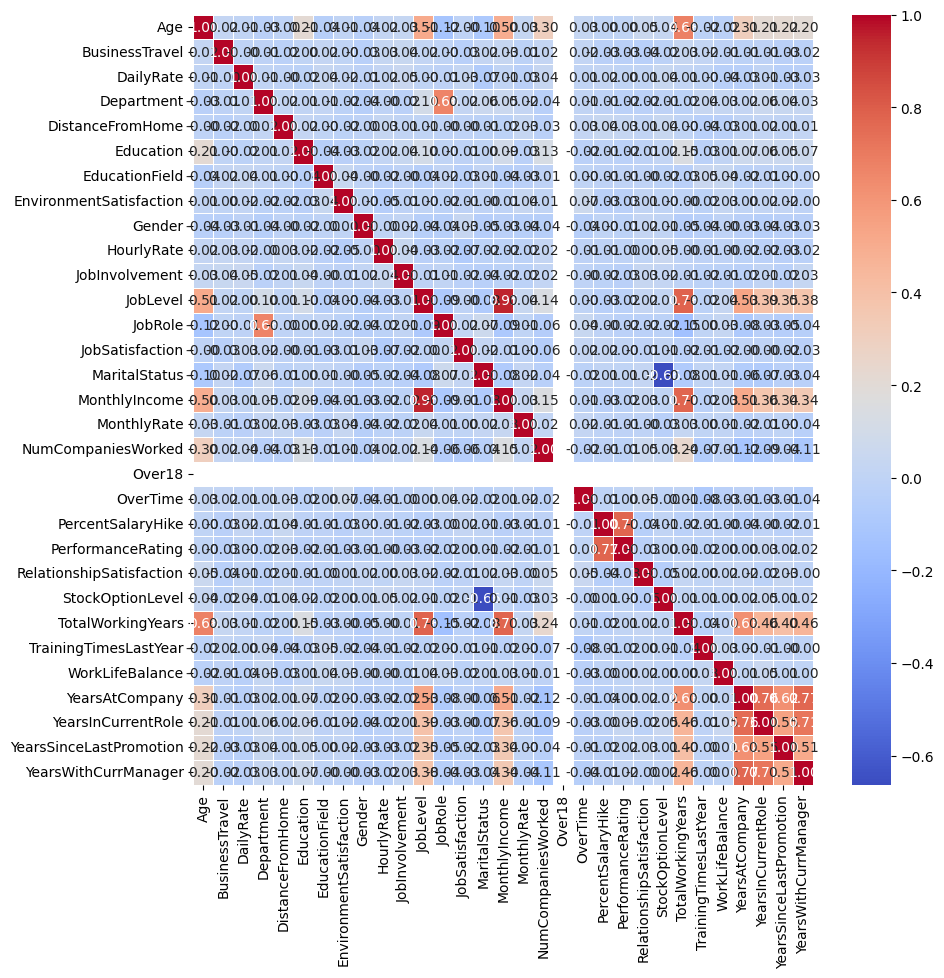

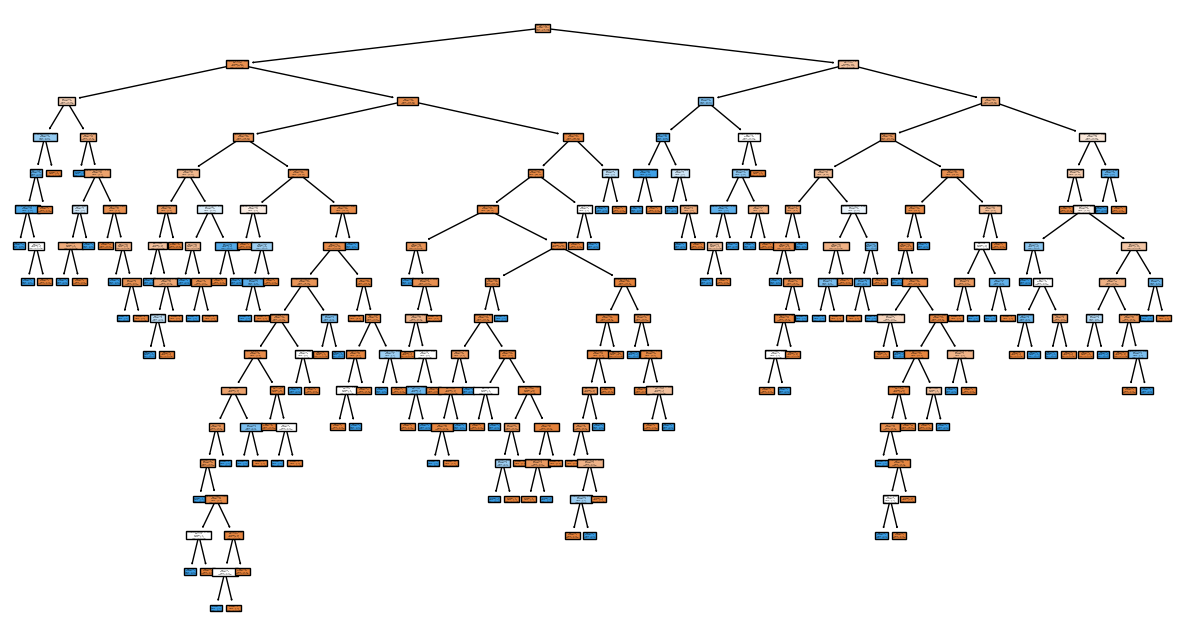

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the employee attrition dataset (replace with your dataset path)
employee_data = pd.read_csv("/kaggle/input/employee-attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv", sep=",", encoding="utf-8")

# Data Exploration
print("Dataset Shape:", employee_data.shape)
print("Random Sample from Dataset:")
print(employee_data.sample(10))
print("Dataset Info:")
print(employee_data.info())
print("Unique Values in Each Column:")
print(employee_data.nunique())
print("Descriptive Statistics:")
print(employee_data.describe())
print("Missing Values:")
print(employee_data.isnull().sum())

# Data Preprocessing
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = employee_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    employee_data[column] = label_encoder.fit_transform(employee_data[column])

# Drop non-numeric columns and target variable
X = employee_data.drop(columns=["EmployeeNumber", "EmployeeCount", "StandardHours", "Attrition"])
y = employee_data["Attrition"]

# Scale the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Correlation matrix for the scaled numeric features
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

# Data Visualization
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_classifier = LogisticRegression(random_state=0)
logistic_classifier.fit(X_train, y_train)
y_pred_logistic = logistic_classifier.predict(X_test)
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
y_pred_tree = decision_tree_classifier.predict(X_test)
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)
accuracy_decision_tree = accuracy_score(y_test, y_pred_tree)

# Plot Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(decision_tree_classifier, filled=True, feature_names=X.columns, class_names=['No Attrition', 'Attrition'])
plt.show()

# Random Forest Classifier with Grid Search
forest_params = {
    'n_estimators': [100, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_forest_classifier = RandomForestClassifier(random_state=100)
grid_search = GridSearchCV(random_forest_classifier, param_grid=forest_params, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

rfc_cv = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                               criterion=best_params['criterion'],
                               max_depth=best_params['max_depth'],
                               max_features=best_params['max_features'],
                               random_state=100)
rfc_cv.fit(X_train, y_train)

# Evaluate Random Forest Classifier
y_pred_random_forest = rfc_cv.predict(X_test)
confusion_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
classification_report_random_forest = classification_report(y_test, y_pred_random_forest)

# Print Accuracy and Classification Reports
print("Logistic Regression:")
print("Confusion Matrix:")
print(confusion_matrix_logistic)
print("Accuracy:", accuracy_logistic)

print("\nDecision Tree Classifier:")
print("Confusion Matrix:")
print(confusion_matrix_tree)
print("Accuracy:", accuracy_decision_tree)

print("\nRandom Forest Classifier:")
print("Confusion Matrix:")
print(confusion_matrix_random_forest)
print("Accuracy:", accuracy_random_forest)
print("Classification Report:")
print(classification_report_random_forest)
